# **2. Linear Regression - TensorFlow 버전**
--------
### **ML?**
일종의 소프트웨어로, 개발자가 이런 환경에서는 이렇게 반응하고, 저런 환경에서는 저렇게 반응하도록 만드는 명시적 프로그래밍(Explicit Programing)   

### **Supervised vs Unsupervised**
- Supervised   
    - 정해진 label이 있는 data로 학습. (Training)
- Unsupervised
    - label을 줄 수 없는 경우, data를 주면 알아서 답을 학습

### **Supervised 종류**
- Regression
    - 오늘 100km 달렸는데 몇 kg 빠질까요?
- Binary classification
    - 저 시험 통과 했나요 안 했나요?
- Multi-level classification
    - 학생은 A입니다.   
    잘못 보냈습니다. 학생의 진짜 등급은 C 입니다.

<br>

**Regression의 의미**:    
전체의 평균으로의 후퇴  

어떤 data가 나와도 전체의 평균으로 되돌아 간다    
<br>

data를 가장 잘 대변하는 직선을 찾는 것이 Linear Regression.   
즉, data를 제일 잘 나타내는 기울기와 y절편을 찾는 것.   

<br>

MSE loss에서 (H(x) - y)²하는 이유는, H(x) - y가 음수가 될 수도 있고 양수가 될 수도 있으니까.


## **Convex Function**
Gradient Descent로 임의로 점을 잡아 출발했는데, 주변에 local minimum이 있을 경우, global minimum을 못 찾을 수 도 있음.   
local minimum과 global minimum이 같은 함수를 Convex Function이라고 하고, 기울기 함수가 이런 형태일 때 Gradient Descent를 사용하기 좋음.

In [4]:
import tensorflow as tf
import numpy as numpy

#tf.enable_eager_execution() # 이 프로그램의 수명 동안 즉시 실행을 활성화

In [7]:
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

W = tf.Variable(2.9) #Variable: tensor를 메모리에 저장하는 변수
                     #torch.FloatTensor() 역할인 듯
b = tf.Variable(0.5)

(0.0, 8.0)

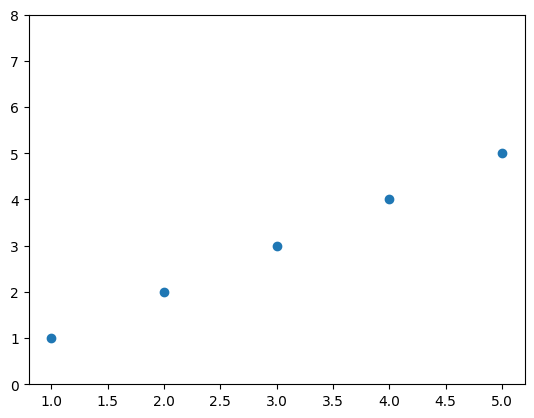

In [5]:
import matplotlib.pyplot as plt
plt.plot(x_data, y_data, 'o')#그래프 선 옵션
                             # 색상: b(파란색), g(초록색), r(빨간색), c(청록색), y(노란색), k(검은색), w(흰색)
                             # 마커: o(원), v(역삼각형), ^(삼각형), s(네모), +(플러스), .(점)
plt.ylim(0, 8) #ylim: 현재 좌표축 또는 차트의 y축 제한을 설정
plt.show()

### Hypothesis & Cost

In [8]:
hypothesis = W * x_data + b
cost = tf.reduce_mean(tf.square(hypothesis - y_data)) #reduce_mean은 특정 차원을 제거하고 평균을 구한다.
                                                      # torch.mean과 비슷한 역할인 듯...
                                                      # 오 tf.square.. 이런건 pytorch에서는 못 봤는데

(0.0, 8.0)

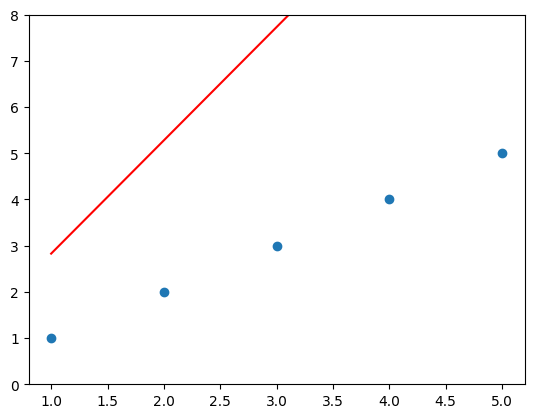

In [10]:
learning_rate = 0.01

with tf.GradientTape() as tape: #optimizer = torch.optim.SGD([W, b], lr = learning_rate)
#with 구문 안에 있는 변수의 변화를 tape 변수에 저장을 한다 헐
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data))

    W_grad, b_grad = tape.gradient(cost, [W, b]) # cost에 대해 W와 b로 미분
                                                 # optimizer.zero_grad()
                                                 # cost.backward()


# cost.backward()
# 미분값 업데이트
W.assign_sub(learning_rate * W_grad) # W-=(learning_rate * W_grad)
b.assign_sub(learning_rate * b_grad) # learning_rate값 곱하는 이유: 이 값을 얼마나 반영 할 것이냐

plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.ylim(0, 8)

### Parameter(W,b) Update


   10|    1.1338|    0.0117|  0.354001
   20|    1.0149|   -0.0204|  0.001694
   30|    1.0067|   -0.0219|  0.000096
   40|    1.0059|   -0.0213|  0.000083
   50|    1.0057|   -0.0206|  0.000078
   60|    1.0055|   -0.0199|  0.000073
   70|    1.0053|   -0.0192|  0.000068
   80|    1.0052|   -0.0186|  0.000063
   90|    1.0050|   -0.0180|  0.000059
  100|    1.0048|   -0.0174|  0.000055


(0.0, 8.0)

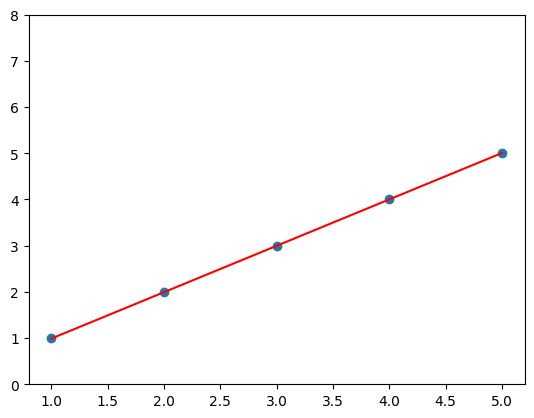

In [12]:
W = tf.Variable(2.9)
b = tf.Variable(0.5)

for i in range(1, 101):
    with tf.GradientTape() as tape:
        hypothesis = W * x_data + b
        cost  = tf.reduce_mean(tf.square(hypothesis - y_data))

    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)

    if i%10 == 0:
        print("{:5}|{:10.4f}|{:10.4f}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.ylim(0, 8)

### Predict


In [13]:
print(W * 5 + b)
print(W * 2.5 + b)

tf.Tensor(5.0066934, shape=(), dtype=float32)
tf.Tensor(2.4946523, shape=(), dtype=float32)
